<a href="https://colab.research.google.com/github/cornel-kim/samples/blob/DS/clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
customers = pandas.read_csv("https://www.modcom.co.ke/datasets/Mall_Customers.csv")
customers

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


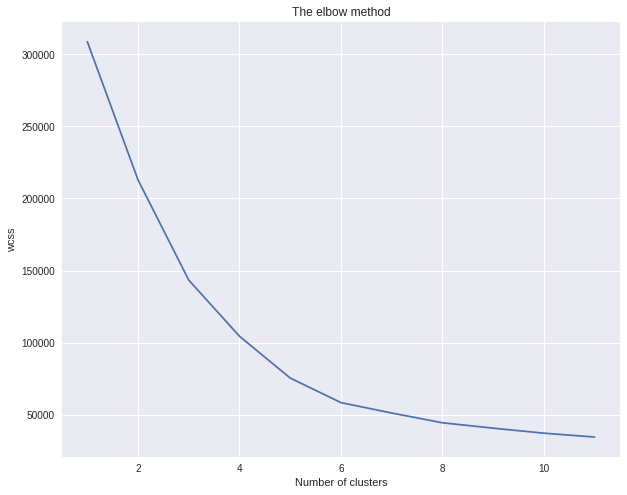

In [11]:
array = customers.values
X = array[:, 2:5]

#inertia or centroids
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
#import kmeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel("Number of clusters")
plt.ylabel('wcss')
plt.show() 


In [12]:
wcss

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.50595493436,
 44307.87341670445,
 40573.697664978696,
 37085.62797727232,
 34415.94689569689]

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

means = model.cluster_centers_
clusters = pandas.DataFrame(means, columns = ['Age', 'Annual Income', 
                                              'Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,40.666667,87.750000,17.583333
1,43.088608,55.291139,49.569620
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


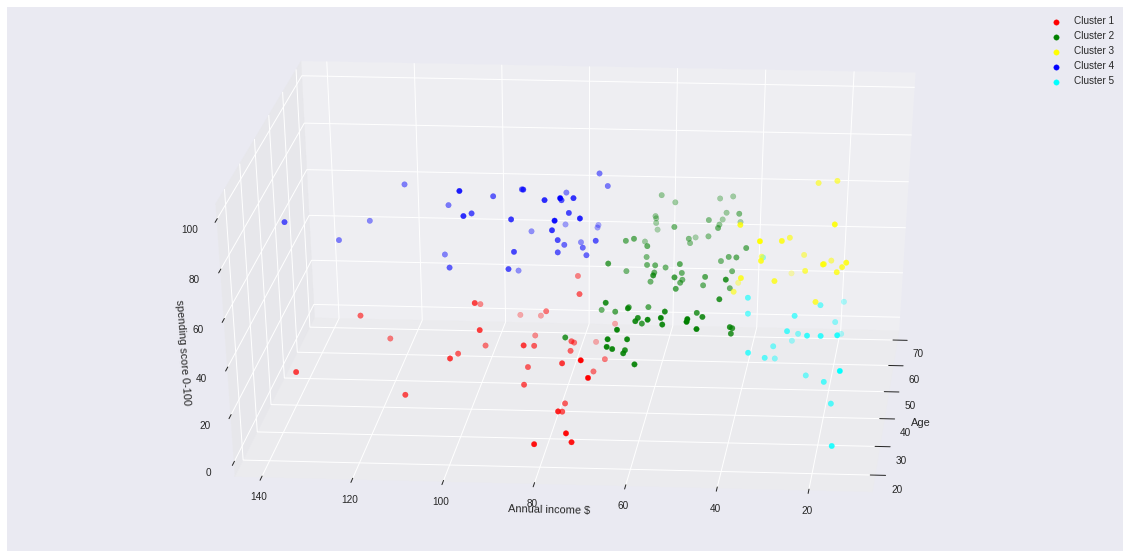

In [15]:
#show clusters in a graph
import matplotlib.pyplot as plt
plt.style.use("seaborn")
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = '3d')

customers['label'] = model.labels_
ax.scatter(customers['Age'][customers['label']==0], 
           customers['Annual Income']
           [customers['label']==0],customers['Spending Score'][customers['label']==0],
           c = 'red', s=30, label='Cluster 1')
ax.scatter(customers['Age'][customers['label']==1], customers['Annual Income']
           [customers['label']==1],customers['Spending Score'][customers['label']==1],
           c = 'Green', s=30, label='Cluster 2')
ax.scatter(customers['Age'][customers['label']==2], customers['Annual Income']
           [customers['label']==2],customers['Spending Score'][customers['label']==2],
           c = 'yellow', s=30, label='Cluster 3')
ax.scatter(customers['Age'][customers['label']==3], customers['Annual Income']
           [customers['label']==3],customers['Spending Score'][customers['label']==3],
           c = 'blue', s=30, label='Cluster 4')
ax.scatter(customers['Age'][customers['label']==4], customers['Annual Income']
           [customers['label']==4],customers['Spending Score'][customers['label']==4],
           c = 'cyan', s=30, label='Cluster 5')
# ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
#            s = 80, c= 'black', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual income $')
ax.set_zlabel('spending score 0-100')
ax.view_init(30, 185)
plt.legend()
plt.show()